In [1]:
import numpy as np
import matplotlib.pylab as plt

In [26]:
data = np.loadtxt('20200424_222144_UTC_SDOM1_MUON_EMBLA_DARK_RUN1_60s_2020-04-24_2222_20115222154.corrected.txt')

In [27]:
#Edge = data[:, 1]
#risingEdge = Edge[Edge>0]
#fallingEdge = Edge[Edge<1]
channel = data[:, 0]
upperPMT = data[(channel==1)]
lowerPMT = data[(channel==5)]
risingEdge = upperPMT[upperPMT[:, 1] == 0]
risingEdgeL = lowerPMT[lowerPMT[:, 1] == 0]
fallingEdge = upperPMT[upperPMT[:, 1] == 1]
fallingEdgeL = lowerPMT[lowerPMT[:, 1] == 1]

In [30]:
fallingEdge.shape, risingEdge.shape

((2407152, 3), (2399223, 3))

In [34]:
fallingEdgeL.shape, risingEdgeL.shape

((1991476, 3), (1985677, 3))

In [28]:
timestamps = risingEdge[:, 2]
selectTimestamps = timestamps[:]
timestampsL = risingEdgeL[:, 2]
selectTimestampsL = timestampsL[:]
#selectTimestamps = selectTimestamps[1500000:2500000]
timestampsFE = fallingEdge[:, 2]
selectTimestampsFE = timestampsFE[:]
timestampsLFE = fallingEdgeL[:, 2]
selectTimestampsLFE = timestampsLFE[:]

In [29]:
index = np.linspace(0, len(selectTimestamps), len(selectTimestamps))
indexFE = np.linspace(0, len(selectTimestampsFE), len(selectTimestampsFE))

<IPython.core.display.Javascript object>


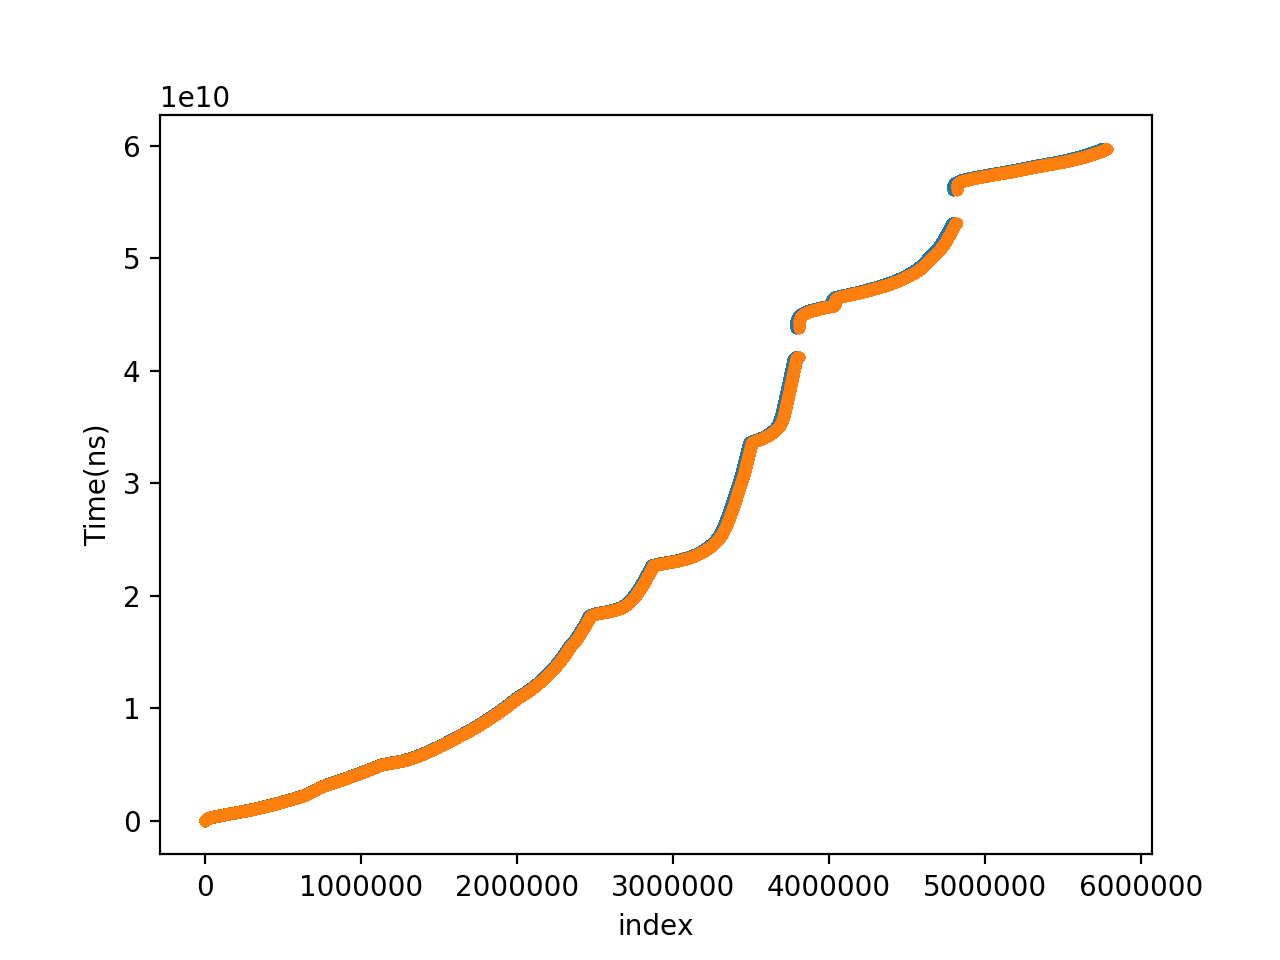

Text(0, 0.5, 'Time(ns)')

In [10]:
%matplotlib notebook
plt.plot(index, selectTimestamps, '.')
plt.xlabel('index')
plt.ylabel('Time(ns)')
plt.plot(indexFE, selectTimestampsFE, '.')
plt.xlabel('index')
plt.ylabel('Time(ns)')

<IPython.core.display.Javascript object>


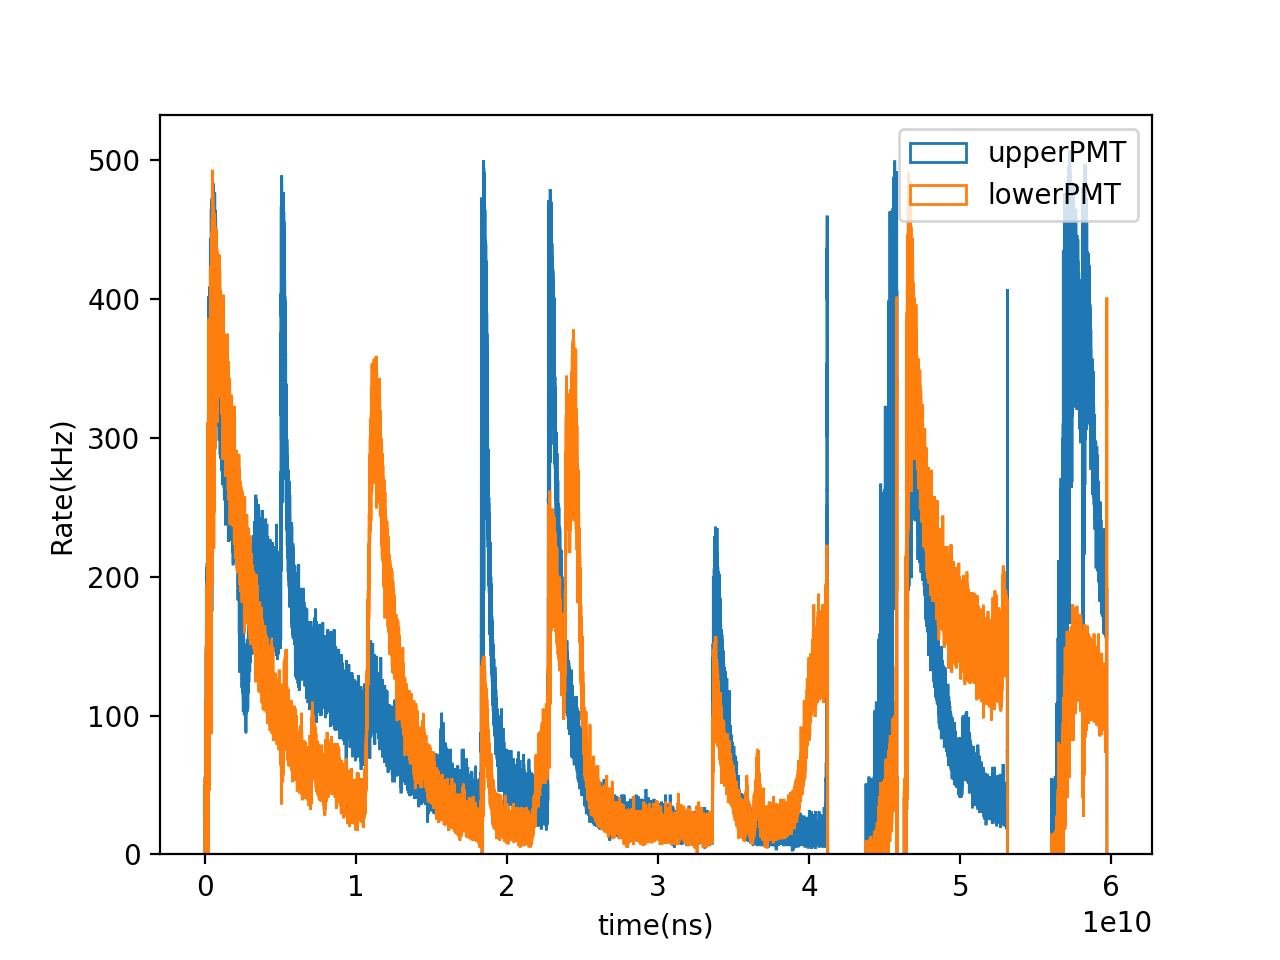

Text(0, 0.5, 'Rate(kHz)')

In [11]:
index = np.linspace(0, len(timestamps), int(len(timestamps)))
#for i in range(0)
bins = np.arange(selectTimestamps.min(), selectTimestamps.max(), 1e6)
binsL = np.arange(selectTimestampsL.min(), selectTimestampsL.max(), 1e6)
plt.hist(selectTimestamps, bins, log=False, histtype='step', label = 'upperPMT')
plt.hist(selectTimestampsL, binsL, log=False, histtype='step', label ='lowerPMT')
rate, binE = np.histogram(selectTimestamps, bins)
rateL, binEL = np.histogram(selectTimestampsL, binsL)
plt.legend()
plt.xlabel('time(ns)')
plt.ylabel('Rate(kHz)')

<IPython.core.display.Javascript object>


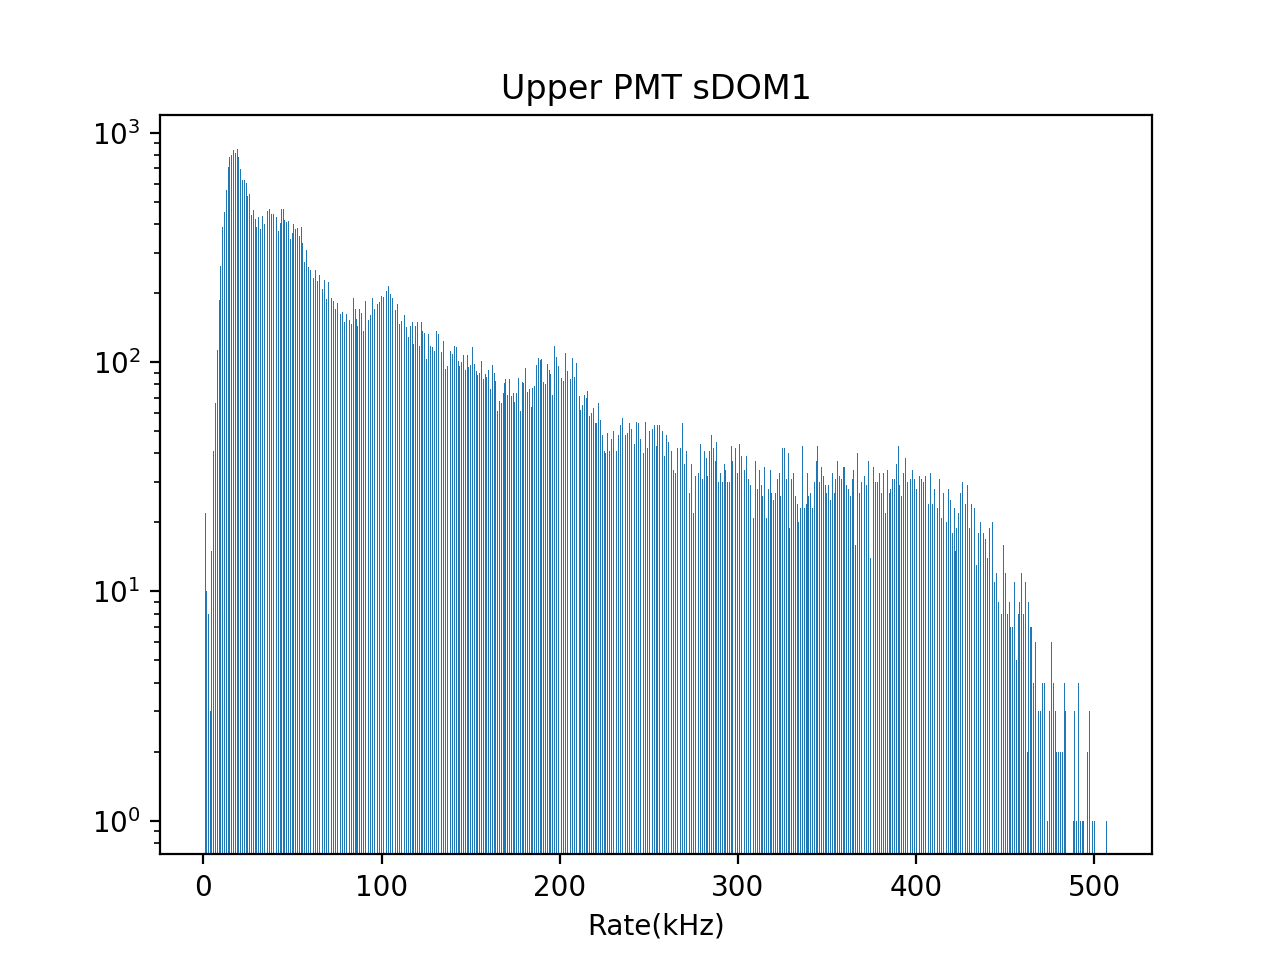

<IPython.core.display.Javascript object>


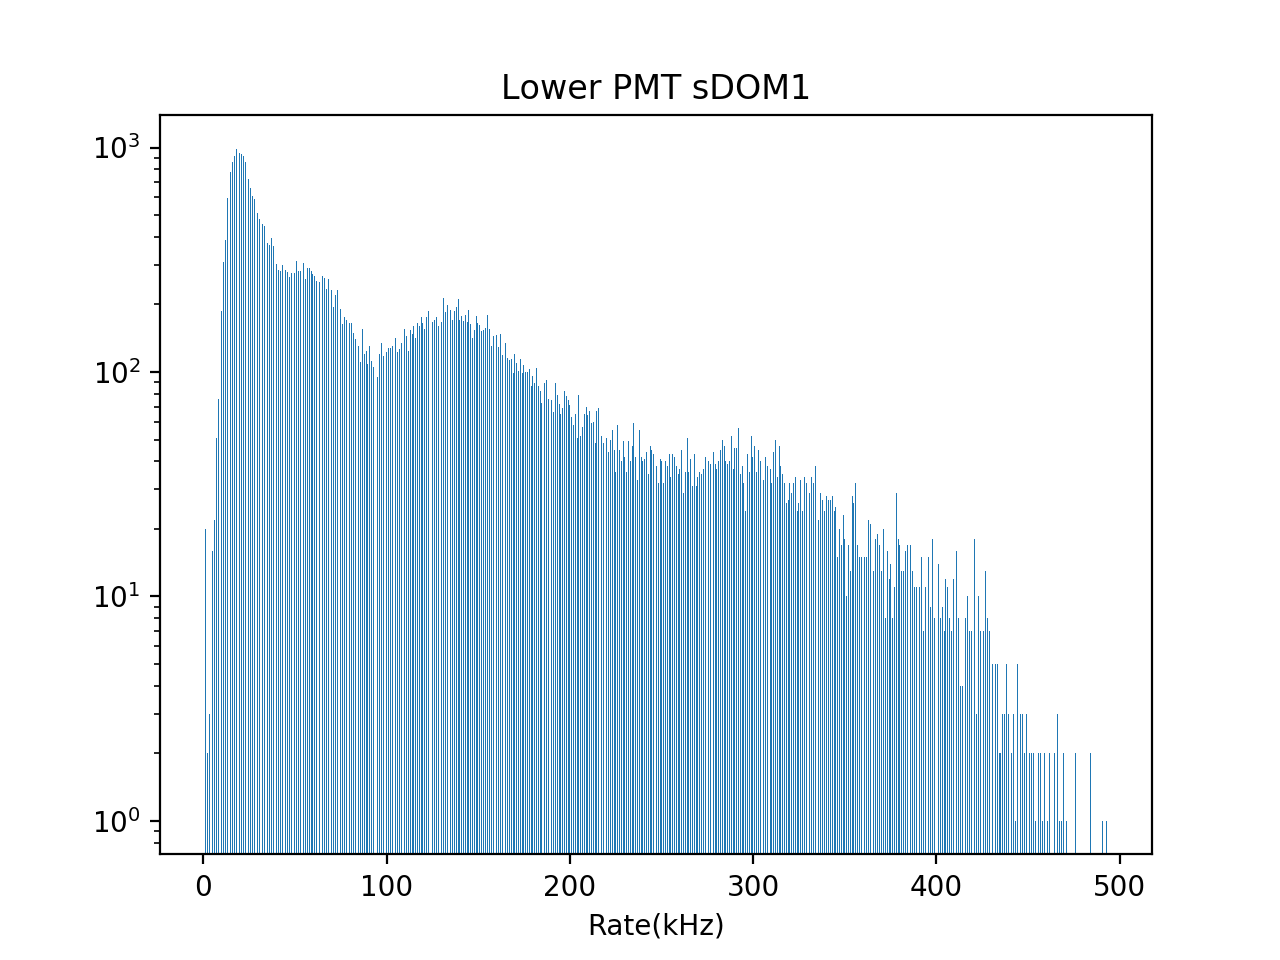

In [12]:
fig = plt.figure()
_ = plt.hist(rate[rate>0], bins = 1000, log=True)
plt.xlabel('Rate(kHz)')
plt.title('Upper PMT sDOM1')
#plt.axvline(x=100, color='r')
fig = plt.figure()
_ = plt.hist(rateL[rateL>0], bins = 1000, log=True)
plt.xlabel('Rate(kHz)')
plt.title('Lower PMT sDOM1')
plt.show()
#plt.axvline(x=100, color='r')
#plt.xscale('log')

<IPython.core.display.Javascript object>


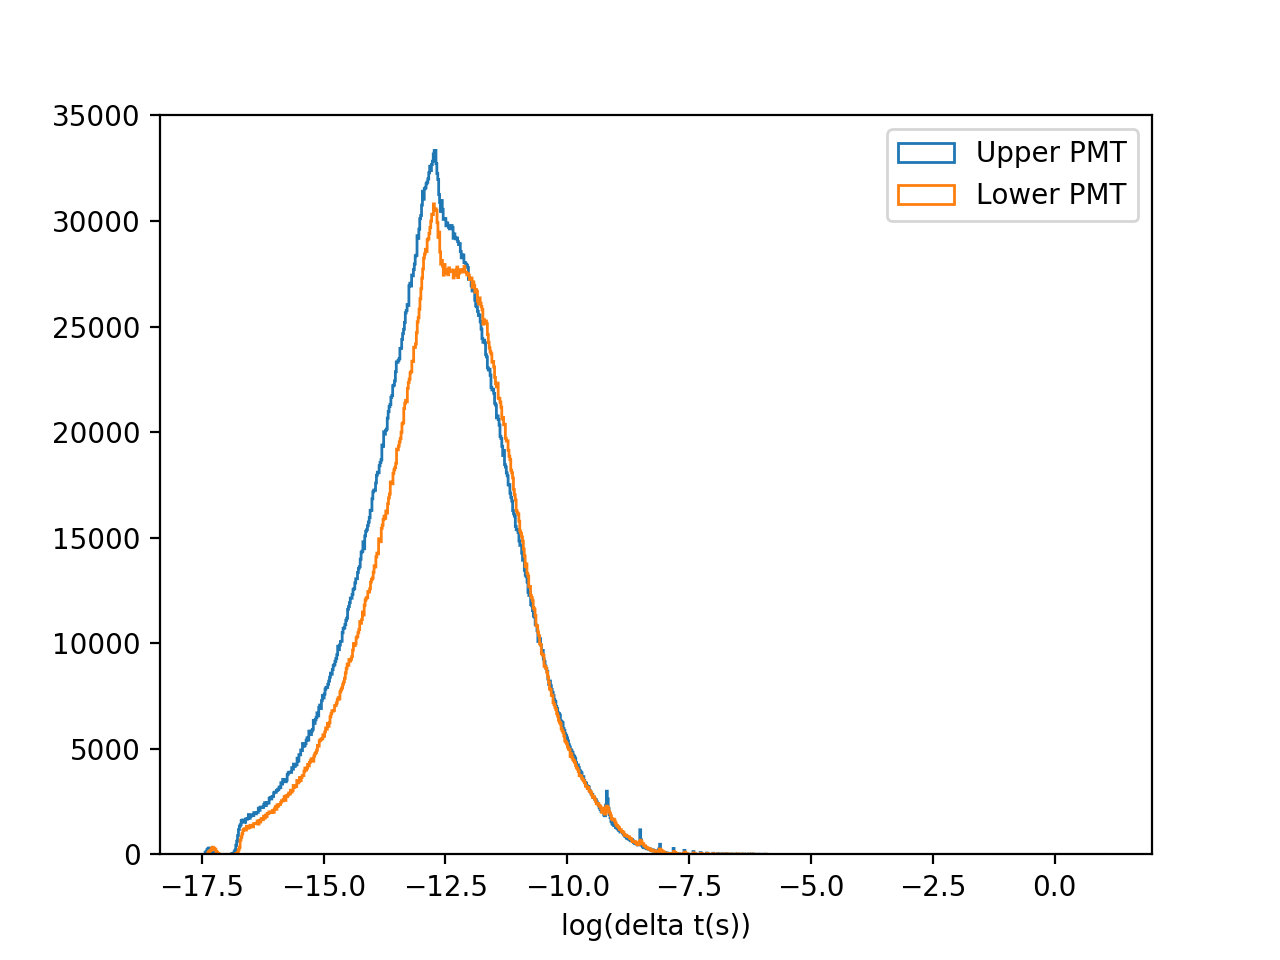

/Users/cosmos2299/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log
  
/Users/cosmos2299/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/cosmos2299/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/Users/cosmos2299/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log
  import sys


Text(0.5, 0, 'log(delta t(s))')

In [11]:
diff = (timestamps[1:]-timestamps[:-1])*1e-9
diffL = (timestampsL[1:]-timestampsL[:-1])*1e-9
#bins = np.arange(selectTimestamps.min(), selectTimestamps.max(), 1000000)
#deltaT, binEDT = np.histogram(diff, 10000)
fig = plt.figure()
_ = plt.hist(np.log(diff), bins = 1000, log=False, label= 'Upper PMT', histtype='step')
_ = plt.hist(np.log(diffL), bins = 1000, log=False, label = 'Lower PMT', histtype='step')
plt.legend()
plt.xlabel('log(delta t(s))')
#plt.xscale('log10')
#plt.xlabel('time(ns)') 
#plt.ylabel('Rate per 0.001s')

<IPython.core.display.Javascript object>


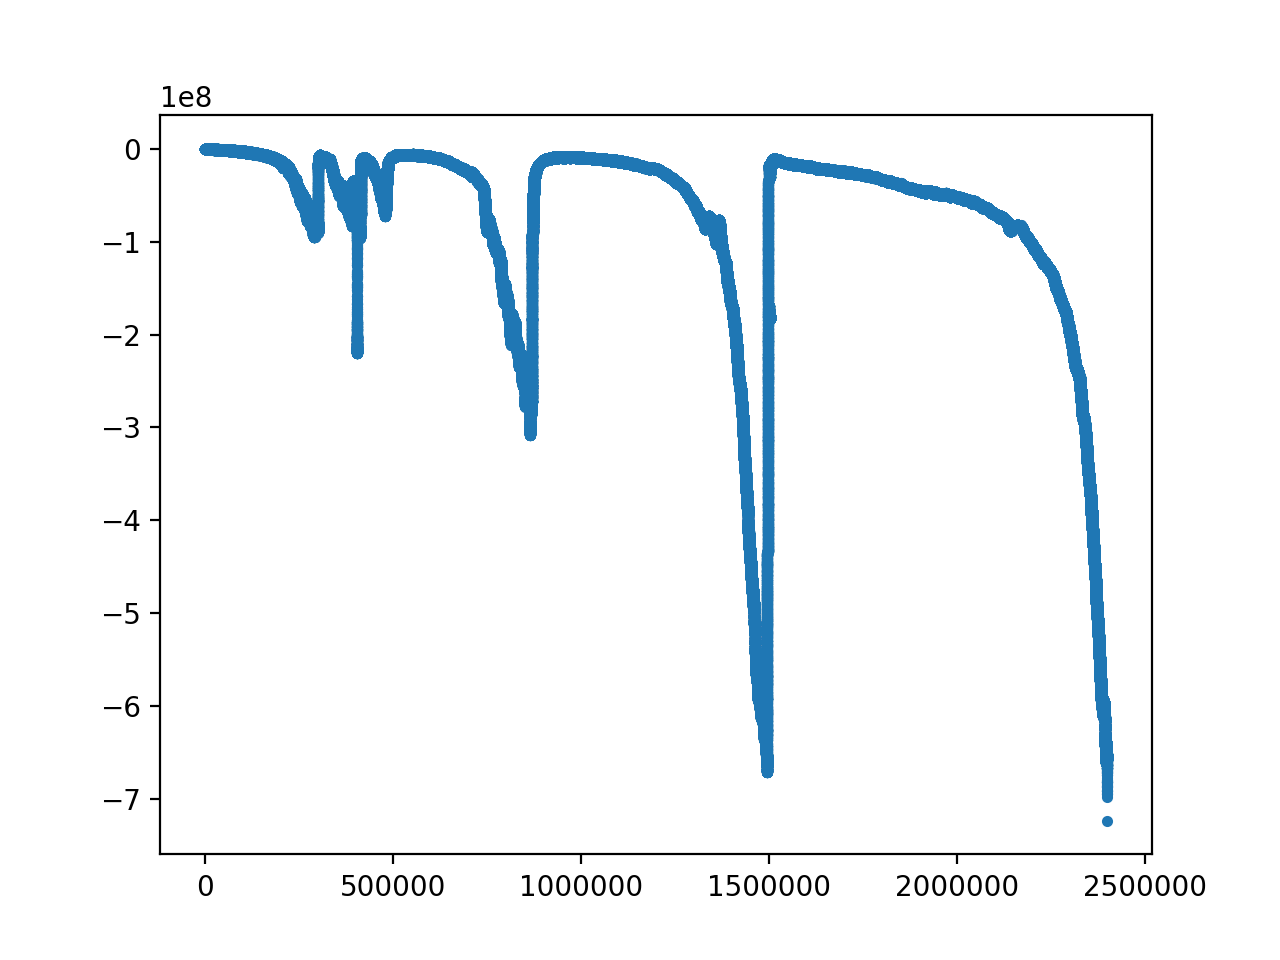

In [33]:
plt.plot(np.linspace(0, len(selectTimestamps),len(selectTimestamps)), selectTimestampsFE[0:2399223] - selectTimestamps, '.')

In [ ]:
np.log10